Columns: Index(['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30_59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60_89DaysPastDueNotWorse',
       'NumberOfDependents', 'AgeGroup', 'HighDebtFlag', 'IncomeGroup',
       'DebtToIncomeRatio'],
      dtype='object')
   Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   

   NumberOfTime30_59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982           9120   
1   

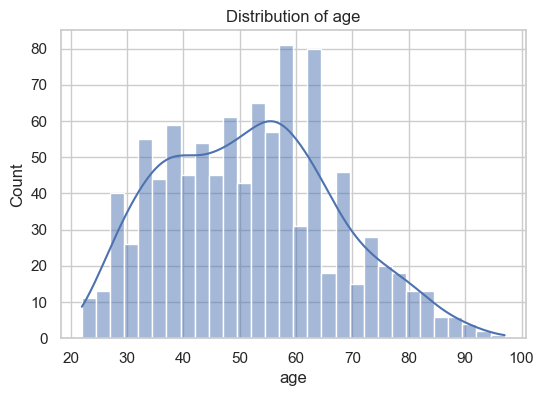

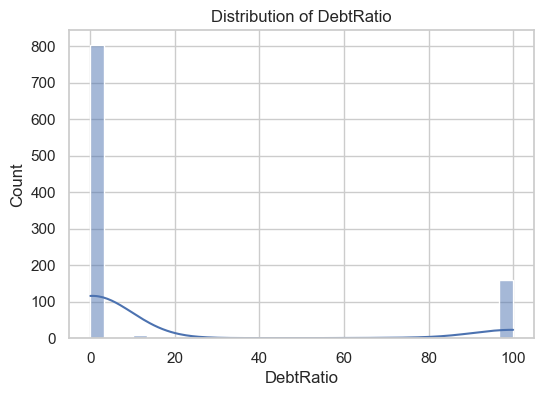

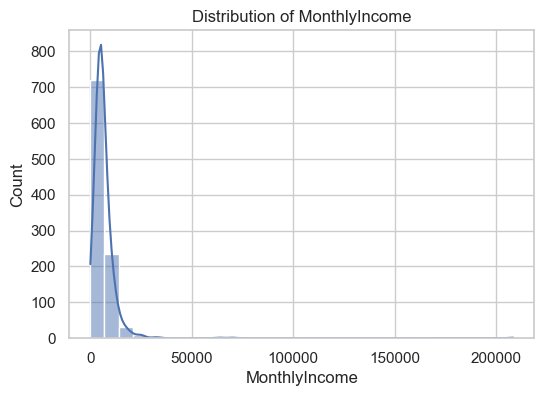

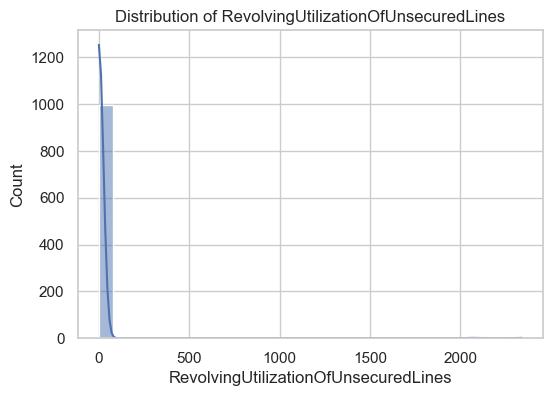

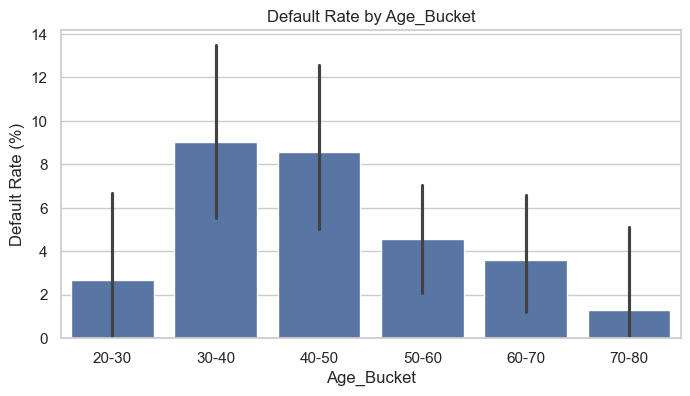

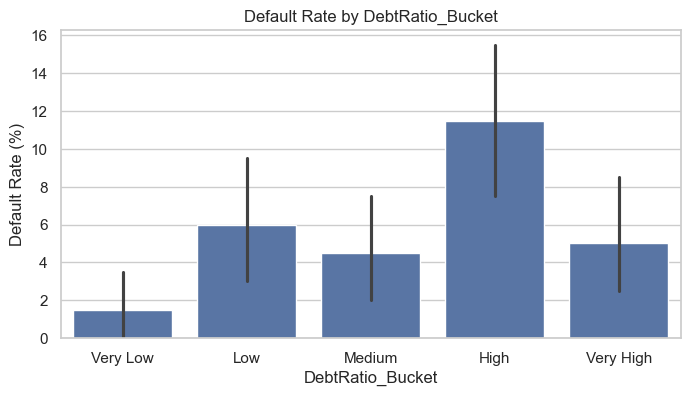

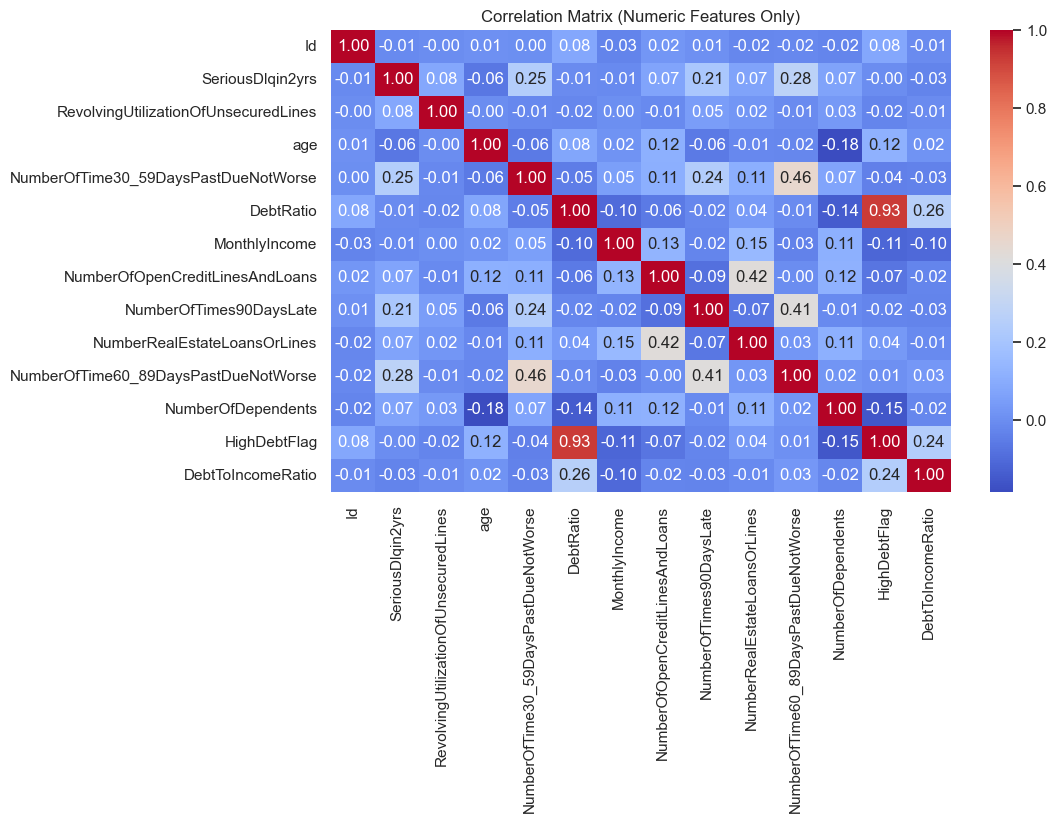

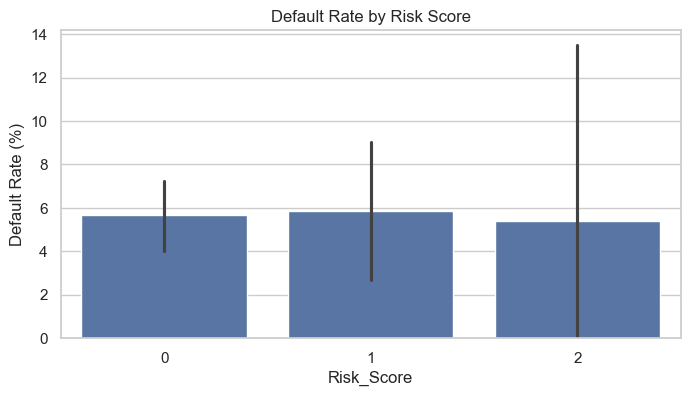

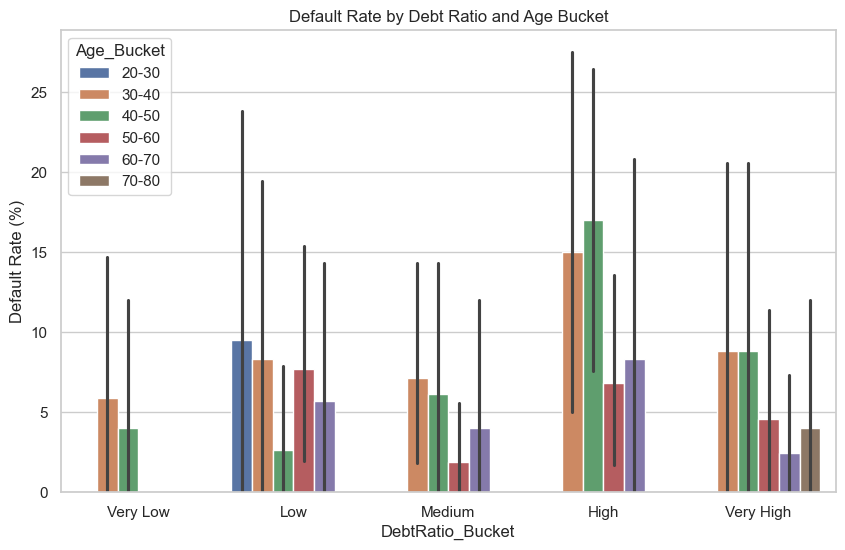


EDA & Risk Scoring Complete!


In [ ]:

# Credit Risk Project - EDA & Risk Scoring

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Step 2: Load Data
data = pd.read_csv("credit_data.csv")  # replace with your CSV file path

# Quick look at data
print("Columns:", data.columns)
print(data.head())
print(data.info())
print(data.describe())

# Step 3: Overall Default Rate
default_rate = data['SeriousDlqin2yrs'].mean() * 100
print(f"\nOverall Default Rate: {default_rate:.2f}%")

# Step 4: Check Missing Values
print("\nMissing Values:\n", data.isnull().sum())

# Step 5: Numeric Feature Distributions
numeric_cols = ['age', 'DebtRatio', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Step 6: Create Buckets for Analysis
data['Age_Bucket'] = pd.cut(
    data['age'], 
    bins=[20,30,40,50,60,70,80], 
    labels=['20-30','30-40','40-50','50-60','60-70','70-80']
)

data['DebtRatio_Bucket'] = pd.qcut(
    data['DebtRatio'], 
    q=5, 
    labels=['Very Low','Low','Medium','High','Very High']
)

# Step 7: Categorical Feature Analysis
categorical_cols = ['Age_Bucket', 'DebtRatio_Bucket']  # add others if exist
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(
        x=col, 
        y='SeriousDlqin2yrs', 
        data=data, 
        estimator=lambda x: sum(x)/len(x)*100
    )
    plt.ylabel('Default Rate (%)')
    plt.title(f'Default Rate by {col}')
    plt.show()

# Step 8: Correlation Heatmap
# Select only numeric columns for correlation
numeric_cols = data.select_dtypes(include=np.number).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


# Step 9: Simple Risk Scoring
# If columns exist in your dataset, otherwise ignore them
if 'HighDebtFlag' in data.columns and 'IncomeGroup' in data.columns:
    data['Risk_Score'] = (
        (data['HighDebtFlag'] == 1).astype(int) +
        (data['IncomeGroup'] == 'Low').astype(int) +
        (data['age'] < 30).astype(int)
    )
    plt.figure(figsize=(8,4))
    sns.barplot(
        x='Risk_Score', 
        y='SeriousDlqin2yrs', 
        data=data, 
        estimator=lambda x: sum(x)/len(x)*100
    )
    plt.ylabel('Default Rate (%)')
    plt.title('Default Rate by Risk Score')
    plt.show()

# Step 10: Cross Feature Analysis Example
plt.figure(figsize=(10,6))
sns.barplot(
    x='DebtRatio_Bucket', 
    y='SeriousDlqin2yrs', 
    hue='Age_Bucket', 
    data=data, 
    estimator=lambda x: sum(x)/len(x)*100
)
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Debt Ratio and Age Bucket')
plt.show()

# Step 11: Outlier Handling
data['DebtRatio'] = data['DebtRatio'].clip(upper=1)
data['MonthlyIncome'] = data['MonthlyIncome'].clip(upper=data['MonthlyIncome'].quantile(0.99))

print("\nEDA & Risk Scoring Complete!")


In [3]:
data.to_csv("credit_data_cleaned.csv", index=False)
